In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler


%store -r X_features_full
%store -r X_features_poly_full
%store -r y_labels_full

%store -r totaldf_full
totaldf = totaldf_full
X_features = X_features_full
X_features_poly = X_features_poly_full
y_labels = y_labels_full

### Βλέπουμε για τα στατιστικά των ensembles μοντέλων τα εξής. Η μέθοδος voting βελτίωσε πολύ  τις προβλέψεις μας με poly regressors αλλά ήταν λίγο χειρότερη στην περίπτωση των κανονικών regressors. To bagging είναι χειρότερο από το random forest ενώ τα boosted και gradient boosting είναι καλύτερα από τον απλό tree regressor.

In [2]:
poly_voting_reg = joblib.load("poly_voting_reg.pkl")
voting_reg = joblib.load("voting_reg.pkl")
bag_reg = joblib.load("bag_reg.pkl")
ada_reg = joblib.load('ada_reg.pkl')
xgb_reg = joblib.load('xgb_reg.pkl')
light_reg = joblib.load("light.pkl")
stack_reg = joblib.load('stack.pkl')


In [3]:
totaldf.insert(7,'poly voting μ', totaldf.μob*(np.exp(np.power(poly_voting_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(8,'voting μ', totaldf.μob*(np.exp(np.power(voting_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(9,'bagging μ', totaldf.μob*(np.exp(np.power(bag_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(10,'boosting μ', totaldf.μob*(np.exp(np.power(ada_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(11,'gradient boosting μ', totaldf.μob*(np.exp(np.power(xgb_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(12,'light μ',totaldf.μob*(np.exp(np.power(light_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(13,'stack μ', totaldf.μob*(np.exp(np.power(stack_reg.predict(X_features[2]),2)) -0.0012))



In [4]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,poly voting μ,voting μ,bagging μ,boosting μ,gradient boosting μ,light μ,stack μ,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,0.998725,0.998706,0.998677,0.998677,0.998694,0.998822,0.998677,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,1.011173,1.011713,1.012051,1.009587,1.009200,1.014521,1.014662,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,1.024554,1.026946,1.027402,1.025931,1.024257,1.027379,1.012743,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,1.037444,1.039043,1.044251,1.039723,1.042498,1.042207,1.044223,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,1.046683,1.049107,1.047059,1.049149,1.038388,1.053222,1.054493,336.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3229.949353,42.548239,0.147960,0.149785,0.151110,0.154485,0.159179,0.141158,0.153123,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3229.949353,42.548239,0.149476,0.151282,0.153214,0.157578,0.158300,0.145211,0.149680,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3229.949353,42.548239,0.152454,0.153709,0.156560,0.164344,0.159520,0.146316,0.154797,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3229.949353,42.548239,0.153608,0.154847,0.153958,0.162414,0.161103,0.148944,0.154718,365.928


In [5]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(7):
        average_error.append(np.average((a.iloc[:,i+7]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+7]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+7]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+7]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Voting polynomial features','Voting','Bagging','AdaBoost','Gradient Boosting','Light','Stacking'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,-0.290174,4.435362,2.711050,3.522335
Voting,-0.287366,4.391715,2.680459,3.490685
Bagging,-0.038445,4.472269,2.733554,3.539823
AdaBoost,0.127154,4.945254,2.922125,3.991603
Gradient Boosting,0.194743,4.793167,2.958319,3.776337
Light,-0.180565,4.717540,3.030791,3.619681
Stacking,0.186145,5.175487,3.240017,4.040124


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,0.237237,3.452181,2.205915,4.177856
Voting,0.289742,3.370856,2.151228,4.145684
Bagging,0.406294,3.563913,2.255190,4.425693
AdaBoost,0.406901,3.816546,2.383555,5.009690
Gradient Boosting,0.606618,3.825047,2.491289,4.899073
Light,0.266356,3.898898,2.564004,4.375713
Stacking,0.879683,4.186091,2.721618,5.235902


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,-1.564400,5.889736,3.771863,86.161203
Voting,-1.607830,5.891518,3.816865,86.088675
Bagging,-1.255881,5.774871,3.660082,83.231078
AdaBoost,-1.349233,5.991999,3.645371,85.967979
Gradient Boosting,-1.226945,5.980619,3.696502,85.812810
Light,-0.772507,5.963082,3.818793,81.887314
Stacking,-1.280951,6.474579,4.071878,88.161065


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,-0.959340,4.452363,2.729632,145.824735
Voting,-0.978161,4.565489,2.809807,149.697722
Bagging,-0.174077,4.998216,3.032929,183.577738
AdaBoost,0.313196,5.474648,3.116197,235.756447
Gradient Boosting,0.350912,5.605501,3.453627,218.944035
Light,-0.788587,5.197940,3.333254,166.639367
Stacking,-0.602238,5.194978,3.470726,157.771413


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,0.707409,5.792428,4.110977,916.746803
Voting,0.306110,5.399405,3.748505,861.761344
Bagging,0.545924,5.331600,3.804583,852.922882
AdaBoost,3.680737,8.014542,6.198513,1334.776240
Gradient Boosting,1.648439,6.049722,4.415226,965.452965
Light,-1.871112,5.538588,4.678044,819.933260
Stacking,0.152348,7.493549,5.555540,1091.746153


Text(0, 0.5, '% Average Absolute Error')

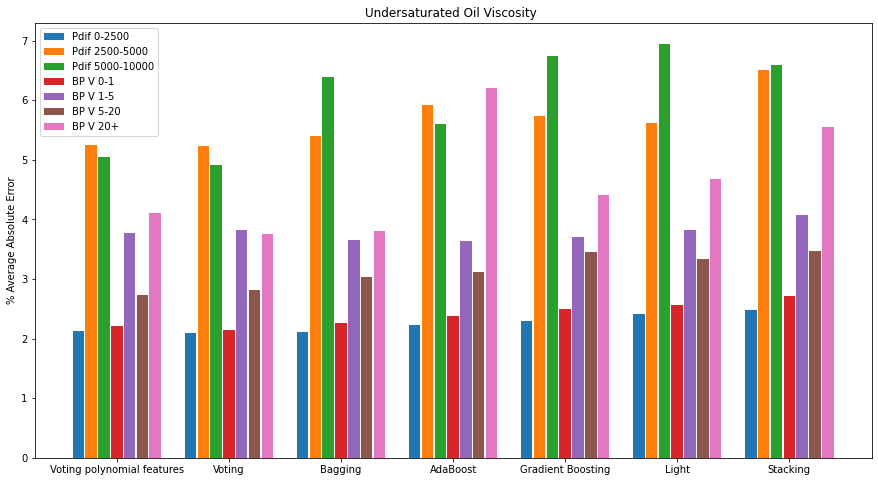

In [17]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}   
models =  ['Voting polynomial features','Voting','Bagging','AdaBoost','Gradient Boosting','Light','Stacking']

%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(7), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")